### **Q1. Key features of the Wine Quality dataset and their importance**

The **Wine Quality dataset** contains physicochemical properties of red/white wine samples. Key features include:

1. **Fixed acidity** – non-volatile acids; too much can lead to sharp taste.
2. **Volatile acidity** – high values negatively affect wine taste (vinegar-like).
3. **Citric acid** – can add freshness; too much can affect balance.
4. **Residual sugar** – affects sweetness; moderate amounts can improve taste.
5. **Chlorides** – saltiness perception; high values are undesirable.
6. **Free sulfur dioxide** – protects wine from microbial spoilage.
7. **Total sulfur dioxide** – excessive amounts affect taste and smell.
8. **Density** – correlates with alcohol and sugar content.
9. **pH** – affects preservation and microbial activity.
10. **Sulphates** – antimicrobial; contributes to wine stability.
11. **Alcohol** – higher alcohol often positively correlates with wine quality.
12. **Quality (target)** – sensory score between 0 and 10.

**Importance**:
- **Alcohol, volatile acidity, sulphates**, and **citric acid** are usually strong predictors.
- Correlation analysis or feature importance (from models like Random Forest) helps assess individual influence.

---

### **Q2. Handling missing data in the wine quality dataset**

**Note**: The original dataset has **no missing values**, but if there were:

**Common techniques**:
1. **Mean/Median imputation**:
   - *Advantages*: Simple, quick, preserves sample size.
   - *Disadvantages*: Ignores variance, may bias distributions.

2. **K-Nearest Neighbors (KNN) imputation**:
   - *Advantages*: Uses similarity, better for numerical data.
   - *Disadvantages*: Computationally expensive, sensitive to outliers.

3. **Multivariate Imputation (e.g., MICE)**:
   - *Advantages*: Considers multiple variables, more accurate.
   - *Disadvantages*: Complex, risk of overfitting.

4. **Model-based imputation**:
   - Uses regression or ML models to predict missing values.

**Choice depends on** data distribution, amount of missingness, and feature correlation.

---

### **Q3. Key factors affecting students’ performance and statistical analysis methods**

**Factors**:
- **Parental education level**
- **School support**
- **Gender**
- **Study time**
- **Health status**
- **Past failures**
- **Internet access**
- **Travel time and family size**

**Statistical analysis approach**:
1. **Descriptive statistics** – to understand central tendencies and variability.
2. **Correlation matrix** – to find linear relationships.
3. **Chi-square tests** – for categorical variable associations.
4. **ANOVA** – to test significance of categorical variables on performance.
5. **Regression analysis** – linear or logistic regression for modeling.
6. **Clustering** – to identify similar performance groups.

---

### **Q4. Feature engineering for student performance dataset**

**Steps involved**:

1. **Variable selection**:
   - Remove redundant or irrelevant columns (e.g., ID, name).

2. **Categorical encoding**:
   - Convert categorical variables like gender, school, internet (Yes/No) using one-hot encoding or label encoding.

3. **Combining features**:
   - Create new features like total study hours, average grades (G1, G2, G3), or interaction terms.

4. **Normalization**:
   - Standardize numeric data (study time, absences) for model stability.

5. **Binning**:
   - Convert continuous grades into categories like ‘Low’, ‘Medium’, ‘High’.

Feature engineering should be guided by both **domain knowledge** and **exploratory data insights**.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("winequality-red.csv")
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.shape

(1599, 12)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.isnull

<bound method DataFrame.isnull of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

In [9]:
df.duplicated

<bound method DataFrame.duplicated of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6     

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

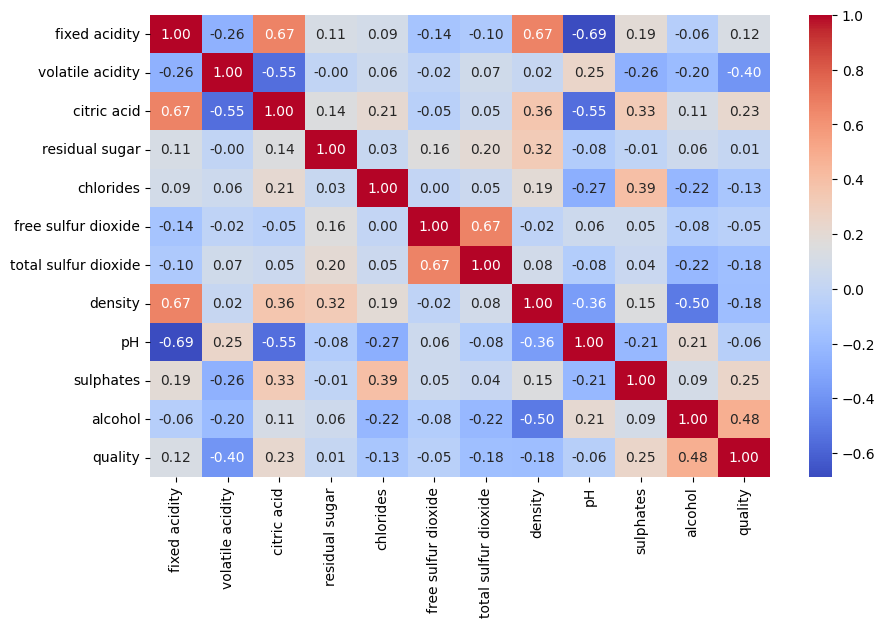

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

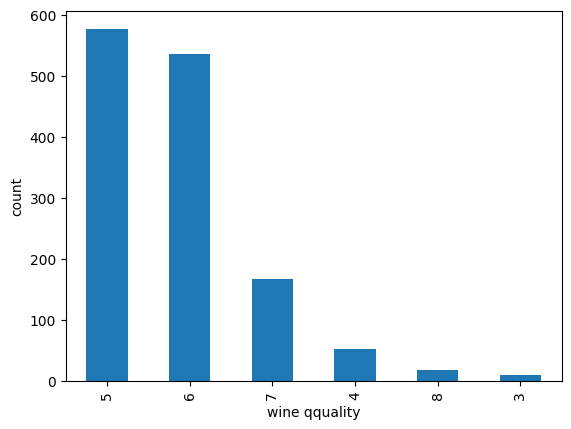

In [18]:
df.quality.value_counts().plot(kind="bar")
plt.xlabel("wine qquality")
plt.ylabel("count")
plt.show()

### Q6. PCA on Wine Quality Dataset

Steps:

    1. Standardize features:

In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.drop("quality", axis=1))

2. Apply PCA:

In [22]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

3. Plot cumulative explained variance:

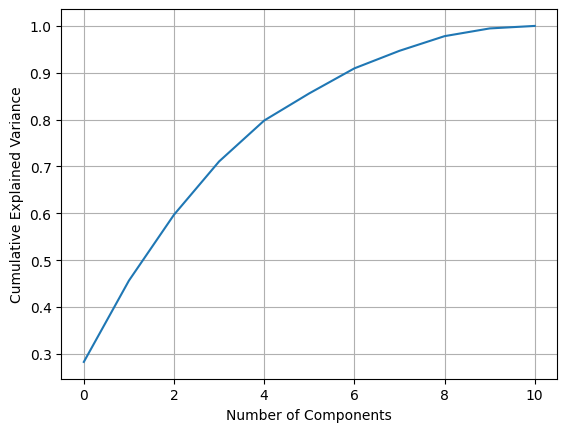

In [23]:
import matplotlib.pyplot as plt
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)


Minimum number of components to explain 90% variance:

   - Typically 6 to 8 principal components are required to explain 90% of the variance.